#Loading data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
titanic = pd.read_csv('titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- ID: self-explanatory
-Survived:	0 = No, 1 = Yes
-Pclass:	Ticket class.	1 = 1st, 2 = 2nd, 3 = 3rd
-Name: self-explanatory
-Sex: gender
-Age:	Age in years
-Sibsp:	# of siblings / spouses aboard the Titanic
-Parch:	# of parents / children aboard the Titanic
-Ticket	Ticket number: self-explanatory
-Fare	Passenger fare: ticket's price
-Cabin: Cabin number
-Embarked: Port of Embarkation	C = Cherbourg, Q = Queenstown,S = Southampton

#Data Exploration

In [3]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


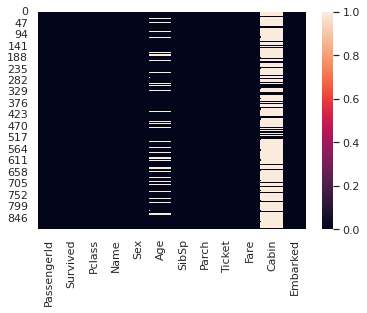

In [4]:
sns.heatmap(titanic.isnull())

We see that there are only missing values in columns 'Age' and 'Cabin'. Everything else is complete.

In [5]:
singles = titanic[titanic['SibSp'] == 0]
singles

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


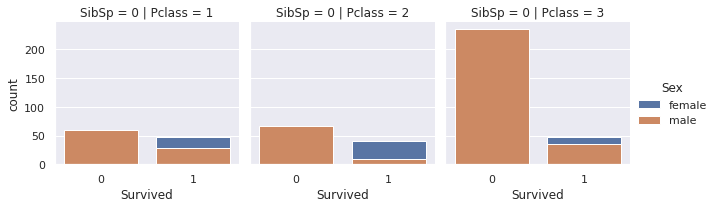

In [6]:
g = sns.FacetGrid(singles, col="Pclass", row="SibSp", hue='Sex')
g = g.map(sns.countplot, 'Survived').add_legend()

In [7]:
accompanied = titanic[titanic['SibSp'] != 0]

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


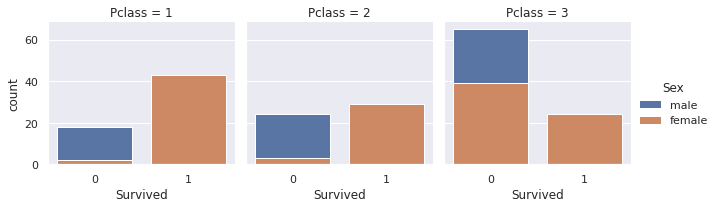

In [8]:
g = sns.FacetGrid(accompanied, col="Pclass", hue='Sex')
g = g.map(sns.countplot, 'Survived').add_legend()

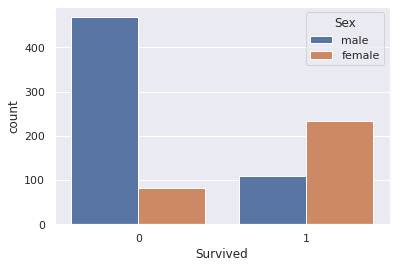

In [9]:
sns.countplot(x='Survived',hue='Sex', data=titanic)

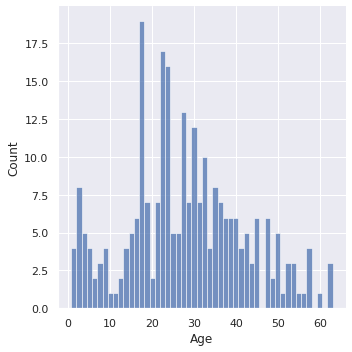

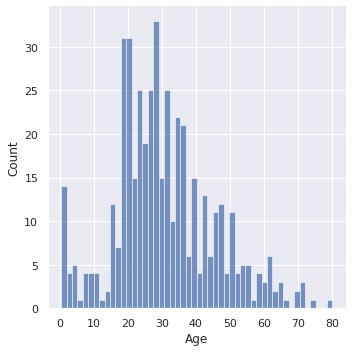

In [10]:
sns.displot(titanic['Age'][titanic['Sex'] == 'female'].dropna(),bins=50)
sns.displot(titanic['Age'][titanic['Sex'] == 'male'].dropna(),bins=50)

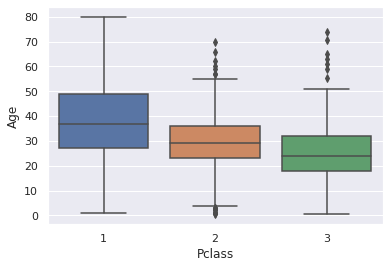

In [11]:
sns.boxplot(x="Pclass", y="Age", data=titanic)

In [12]:
titanic.groupby(["Sex","Pclass"])['Age'].median()

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [13]:
titanic.groupby(["Sex","Pclass"])['Age'].count()

Sex     Pclass
female  1          85
        2          74
        3         102
male    1         101
        2          99
        3         253
Name: Age, dtype: int64

In [14]:
titanic[titanic['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [15]:
titanic[titanic['Age'].isnull()].groupby(["Sex","Pclass"])['PassengerId'].count()

Sex     Pclass
female  1          9
        2          2
        3         42
male    1         21
        2          9
        3         94
Name: PassengerId, dtype: int64

# Imputing missing values 

We will impute missing values for 'Age' with the median corresponding to each combination of gender + class.

In [16]:
titanic['Age'] = titanic['Age'].fillna(titanic.groupby(["Sex","Pclass"])['Age'].transform('median'))

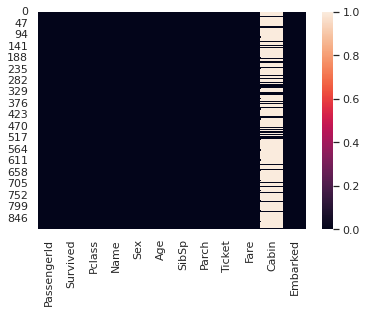

In [17]:
sns.heatmap(titanic.isnull())

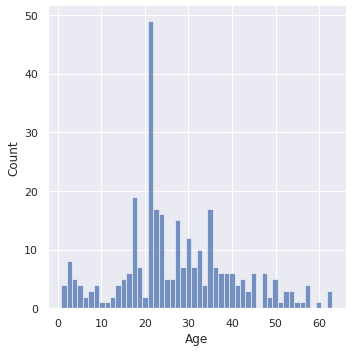

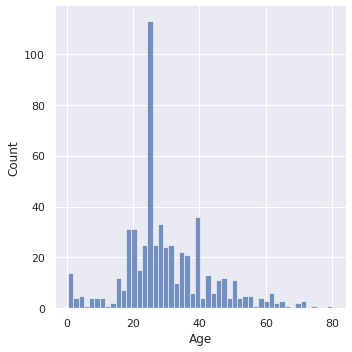

In [18]:
sns.displot(titanic['Age'][titanic['Sex'] == 'female'].dropna(),bins=50)
sns.displot(titanic['Age'][titanic['Sex'] == 'male'].dropna(),bins=50)

In [19]:
# Dropping columns that do not provide much information.
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1,inplace=True)

In [20]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Converting categorical variables into numercial

In [21]:
# setting 1 for males, 0 for females
gender = pd.get_dummies(titanic['Sex'],drop_first=True)
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [22]:
# Coding port of Embarkation	Cherbourg:(Q=0, S=0), Queenstown:(Q=1, S=0), Southampton:(Q=0, S=1)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [23]:
titanic.drop(['Sex','Embarked'],axis=1,inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [25]:
titanic = pd.concat([titanic,gender,embark],axis=1)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Building Logistic Regression model

##Splitting data set

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop('Survived',axis=1), 
                                                    titanic['Survived'], 
                                                    test_size=0.30)

In [30]:
print( X_train.shape, X_test.shape)
print( y_train.shape, y_test.shape)

(623, 8) (268, 8)
(623,) (268,)


# K-cross validation with Ridge regularization

##K-cross validation with K=2


video for reference:
https://www.google.com/search?q=%22cross_val_predict%22+sklearn&rlz=1C1UEAD_esMX993MX993&biw=1645&bih=855&tbm=vid&sxsrf=AJOqlzWNbbCEmwfe3s4tB06Q51KCu00GDQ%3A1675661318004&ei=BZDgY7X2PLPPkPIPj6mHqA8&ved=0ahUKEwj1jP7slID9AhWzJ0QIHY_UAfUQ4dUDCA0&uact=5&oq=%22cross_val_predict%22+sklearn&gs_lcp=Cg1nd3Mtd2l6LXZpZGVvEAMyBAgjECdQ67cHWKrKB2CizQdoAHAAeACAAXaIAf0CkgEDMy4xmAEAoAEBwAEB&sclient=gws-wiz-video#fpstate=ive&vld=cid:ba7dc3ff,vid:jMpY3bKilkI

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, r2_score

In [66]:
logmodel = LogisticRegression(penalty="l2", max_iter=1000) # penalty="l2" for the Ridge regularization.

In [67]:
scores = cross_val_score(logmodel, X_train, y_train, cv = 2)
print ('Scores: ', scores, '\nMean Score: ', np.mean(scores), '\nSTD of Scores: ', np.std(scores))

Scores:  [0.79487179 0.80707395] 
Mean Score:  0.8009728749278588 
STD of Scores:  0.006101080056064023


In [85]:
prediction = cross_val_predict(logmodel, X_test, y_test, cv = 2)
print(len(prediction), len(y_test))
accuracy = metrics.accuracy_score(y_test, prediction)
accuracy

268 268


0.7835820895522388

In [72]:
scoring = {'Accuracy': make_scorer(accuracy_score),
           'Precision': make_scorer(precision_score), 
           'Recall': make_scorer(recall_score)}

results = cross_validate(logmodel, X_train, y_train, scoring = scoring, cv = 2)
results

{'fit_time': array([0.0447464 , 0.04347944]),
 'score_time': array([0.00389647, 0.00398755]),
 'test_Accuracy': array([0.79487179, 0.80707395]),
 'test_Precision': array([0.74380165, 0.79245283]),
 'test_Recall': array([0.73170732, 0.68852459])}

In [82]:
logmodel.fit(X_train, y_train)      # fitting model
y_hat = logmodel.predict(X_test)    # doing predictions
logmodel.score(X_test, y_test)      # scoring model

0.7835820895522388

##K-cross validation with K=4

In [83]:
scores = cross_val_score(logmodel, X_train, y_train, cv = 4)
print ('Scores: ', scores, '\nMean Score: ', np.mean(scores), '\nSTD of Scores: ', np.std(scores))

Scores:  [0.80769231 0.80128205 0.78846154 0.81935484] 
Mean Score:  0.8041976840363937 
STD of Scores:  0.011158840936646947


In [86]:
prediction = cross_val_predict(logmodel, X_test, y_test, cv = 4)
print(len(prediction), len(y_test))
accuracy = metrics.accuracy_score(y_test, prediction)
accuracy

268 268


0.7761194029850746

In [87]:
scoring = {'Accuracy': make_scorer(accuracy_score),
           'Precision': make_scorer(precision_score), 
           'Recall': make_scorer(recall_score)}

results = cross_validate(logmodel, X_train, y_train, scoring = scoring, cv = 4)
results

{'fit_time': array([0.05930114, 0.03364468, 0.044348  , 0.048455  ]),
 'score_time': array([0.00401378, 0.00404191, 0.00409412, 0.00385857]),
 'test_Accuracy': array([0.80769231, 0.80128205, 0.78846154, 0.81935484]),
 'test_Precision': array([0.77192982, 0.75      , 0.77358491, 0.78947368]),
 'test_Recall': array([0.72131148, 0.73770492, 0.66129032, 0.73770492])}

In [88]:
logmodel.fit(X_train, y_train)      # fitting model
y_hat = logmodel.predict(X_test)    # doing predictions
logmodel.score(X_test, y_test)      # scoring model

0.7835820895522388

##K-cross validation with K=5

In [89]:
scores = cross_val_score(logmodel, X_train, y_train, cv = 5)
print ('Scores: ', scores, '\nMean Score: ', np.mean(scores), '\nSTD of Scores: ', np.std(scores))

Scores:  [0.816      0.744      0.832      0.82258065 0.82258065] 
Mean Score:  0.8074322580645161 
STD of Scores:  0.03212344555651645


In [90]:
prediction = cross_val_predict(logmodel, X_test, y_test, cv = 5)
print(len(prediction), len(y_test))
accuracy = metrics.accuracy_score(y_test, prediction)
accuracy

268 268


0.7910447761194029

In [91]:
scoring = {'Accuracy': make_scorer(accuracy_score),
           'Precision': make_scorer(precision_score), 
           'Recall': make_scorer(recall_score)}

results = cross_validate(logmodel, X_train, y_train, scoring = scoring, cv = 5)
results

{'fit_time': array([0.1040082 , 0.08056617, 0.13006997, 0.10525513, 0.11906505]),
 'score_time': array([0.0065279 , 0.00630379, 0.00635576, 0.00613046, 0.00961733]),
 'test_Accuracy': array([0.816     , 0.744     , 0.832     , 0.82258065, 0.82258065]),
 'test_Precision': array([0.7826087 , 0.67346939, 0.85      , 0.8       , 0.78723404]),
 'test_Recall': array([0.73469388, 0.67346939, 0.69387755, 0.73469388, 0.75510204])}

In [92]:
logmodel.fit(X_train, y_train)      # fitting model
y_hat = logmodel.predict(X_test)    # doing predictions
logmodel.score(X_test, y_test)      # scoring model

0.7835820895522388

# Conclusion
It seems that by increasing the K-fold validation, the average of the model accuracy increases.